Author: Goldie Malamud

# Convolutional Neural Network model contruction + test
### This jupyter notebook contains my methodology of training a CNN to predict the class of a given 28x28 image


Here, I am loading in the dataset from the 4 CSV files. xtrain is being reshaped to (47520,28,28) and xtest is being reshaped to (6480, 28, 28) since these are 28x28 pixel images. I reshaped them both to a 2D array because each image is in fact a 28 pixel (height) x 28 pixel (width) image so it would make sense to reshape them in this way.

In [30]:
import numpy as np
xtrain = np.loadtxt('xtrain.csv')
xtest = np.loadtxt('xtest.csv')
ytrain = np.loadtxt('ytrain.csv')
ytest = np.loadtxt('ytest.csv')

print(xtrain.shape, xtest.shape , ytrain.shape, ytest.shape )
xtrain = xtrain.reshape((xtrain.shape[0], 28,28))
xtest = xtest.reshape((xtest.shape[0],28,28))
print("xtrain1 shape: ", xtrain.shape)
print("xtest1 shape: ",xtest.shape)

(47520, 784) (6480, 784) (47520,) (6480,)
xtrain1 shape:  (47520, 28, 28)
xtest1 shape:  (6480, 28, 28)


This dataset consists of 47,520 training samples and 6,480 test samples. Each example is a 28x28 grayscale image, associated with a label from 1 of 9 possible classes. 

Below, I will design a classification neural network.


## Part A

- Before visualizing each class, I converted the labels from [247,255] to [0,8] classes so that when I later do one-hot encoding (make dummy variables for each class) it will be 9 features instead of 256 features. I did in fact realize later on that I could have just removed the unnecessary features from the output of one-hot encoding if I stuck with the original labels. However, at the time this made the most sense to me. Since I converted the labels to [0,8], when I predicted the classes for the Q3 I converted them back to their original [247,255] labels. 

- To visualize each class, I created 9 arrays (label_1, label_2, ... ). I then looped through xtrain and appended the appropriate sample to the appropraite label array. I created a function visualize_classes() that took in each array of same labels and plotted the image with plt.imshow(). 

- This dataset is comprised of sneakers, shirts, sandals, dresses, etc. 

Class 1


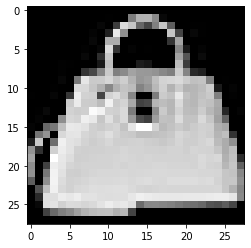

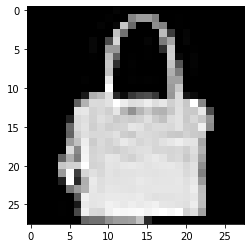

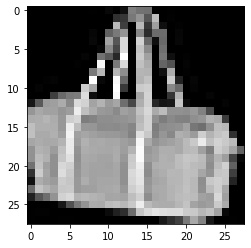

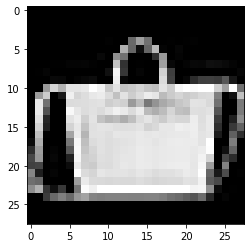

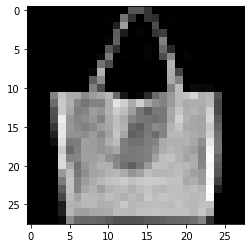



Class 2


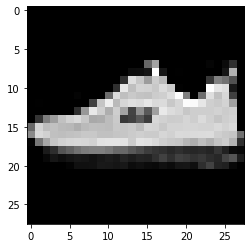

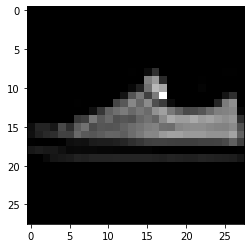

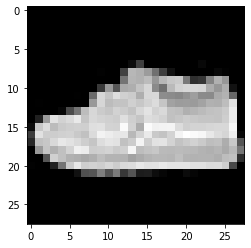

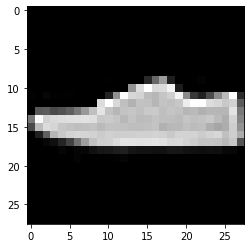

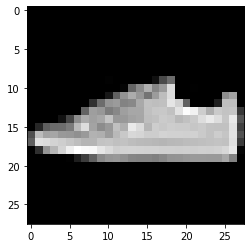



Class 3


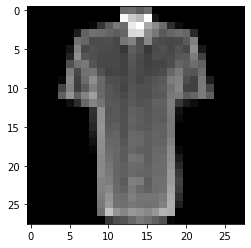

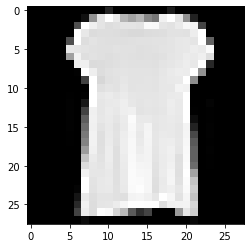

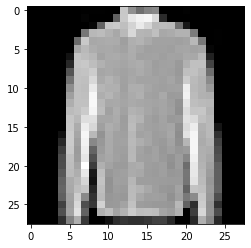

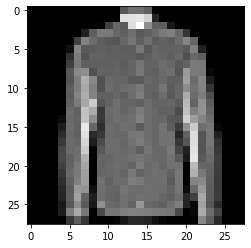

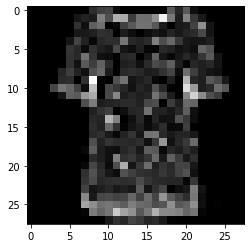



Class 4


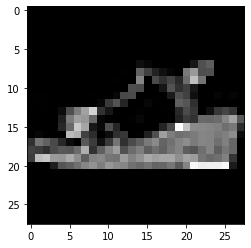

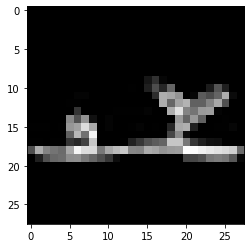

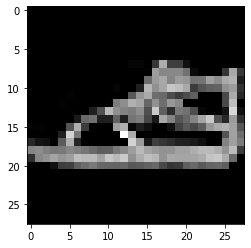

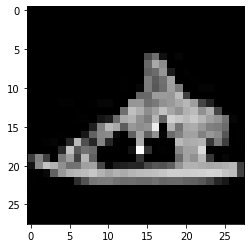

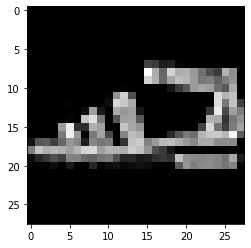



Class 5


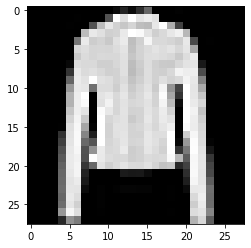

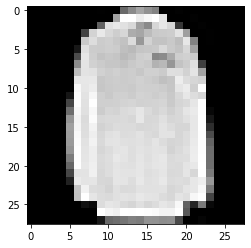

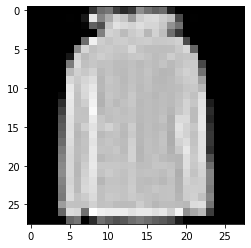

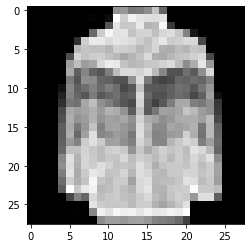

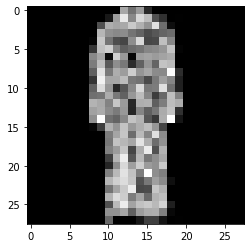



Class 6


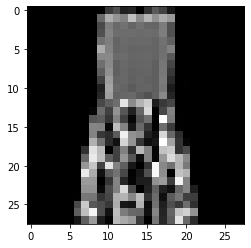

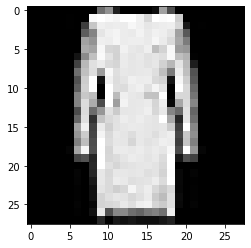

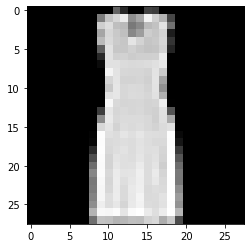

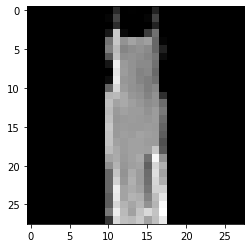

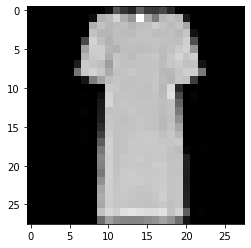



Class 7


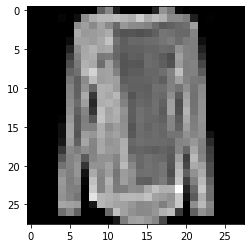

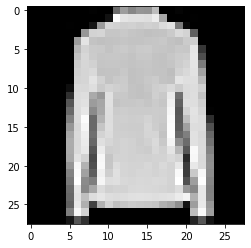

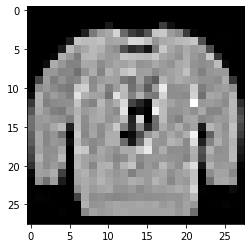

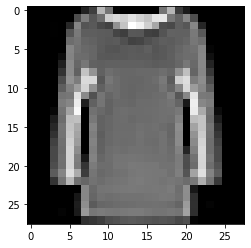

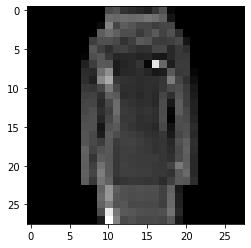



Class 8


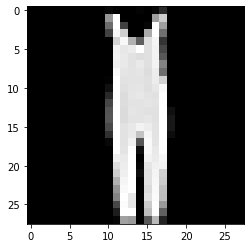

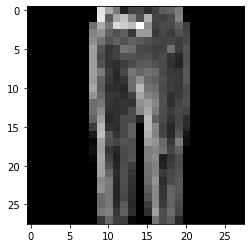

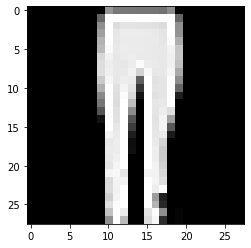

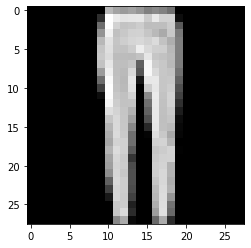

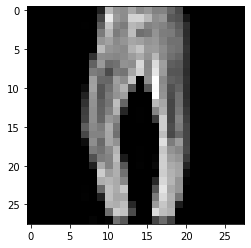



Class 9


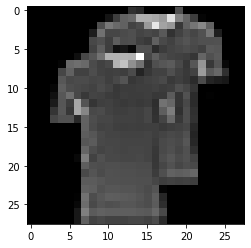

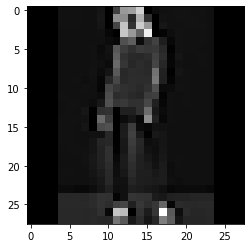

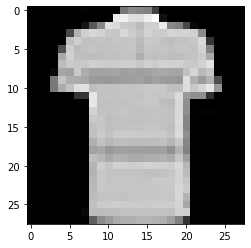

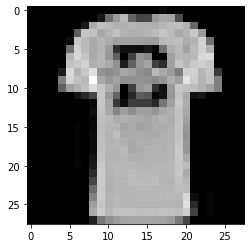

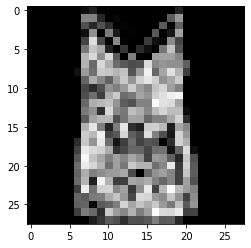

In [31]:
import matplotlib.pyplot as plt
### your code for part a
def visualize_classes(label_x):    
     for i in label_x[:5]: #first 5 samples in label_x
        plt.imshow(np.array(i),cmap=plt.cm.binary)
        plt.show() 
        
#change labels to 0 to 8 (9 classes)
class_labels = [247,248,249,250,251,252,253,254,255]
def convert_classLabels(t_set):
    for i in range(len(t_set)):
        if t_set[i] == class_labels[0]:
            t_set[i] = 0
        elif t_set[i] == class_labels[1]:
            t_set[i] = 1
        elif t_set[i] == class_labels[2]:
            t_set[i] = 2
        elif t_set[i] == class_labels[3]:
            t_set[i] = 3
        elif t_set[i] == class_labels[4]:
            t_set[i] = 4
        elif t_set[i] == class_labels[5]:
            t_set[i] = 5
        elif t_set[i] == class_labels[6]:
            t_set[i] = 6
        elif t_set[i] == class_labels[7]:
            t_set[i] = 7
        elif t_set[i] == class_labels[8]:
            t_set[i] = 8
    return t_set
#array of samples
label_1 = []
label_2 = []
label_3 = []
label_4 = []
label_5 = []
label_6 = []
label_7 = []
label_8 = []
label_9 = []
ytrain = convert_classLabels(ytrain)
ytest = convert_classLabels(ytest)

#add each sample into their appropriate class label 
for i in range(len(ytrain)):
    if ytrain[i] == 0:
        label_1.append(xtrain[i])
    elif ytrain[i] == 1:
        label_2.append(xtrain[i])
    elif ytrain[i] == 2:
        label_3.append(xtrain[i])
    elif ytrain[i] == 3:
        label_4.append(xtrain[i])
    elif ytrain[i] == 4:
        label_5.append(xtrain[i])
    elif ytrain[i] == 5:
        label_6.append(xtrain[i])
    elif ytrain[i] == 6:
        label_7.append(xtrain[i])
    elif ytrain[i] == 7:
        label_8.append(xtrain[i])
    elif ytrain[i] == 8:
        label_9.append(xtrain[i])
        
print("Class 1") 
visualize_classes(label_1)
print("\n")
print("Class 2") 
visualize_classes(label_2)
print("\n")
print("Class 3") 
visualize_classes(label_3)
print("\n")
print("Class 4")
visualize_classes(label_4)
print("\n")
print("Class 5")
visualize_classes(label_5)
print("\n")
print("Class 6")
visualize_classes(label_6)
print("\n")
print("Class 7")
visualize_classes(label_7)
print("\n")
print("Class 8")
visualize_classes(label_8)
print("\n")
print("Class 9")
visualize_classes(label_9)

I then reshaped xtrain and xtest to (47520, 28, 28, 1) and (6480, 28, 28, 1) respectively. The extra 1 is telling us that this a black and white dataset. 

In [32]:
xtrain = xtrain.reshape((xtrain.shape[0], 28,28,1))
xtest = xtest.reshape((xtest.shape[0],28,28,1))
print("xtrain shape: ", xtrain.shape)
print("xtest shape: ",xtest.shape)

xtrain shape:  (47520, 28, 28, 1)
xtest shape:  (6480, 28, 28, 1)


## Part B

- To preprocess the data, I looped through both xtrain and xtest to see if there were any na values. There were none in both. I then converted xtrain and xtest from integer values to float32 to prepare the pixels and then scaled both xtrain and xtest to have values between 0 and 1 for normalization. 

- I then used one hot encoding to create dummy variables for all classes in y_train and y_test. I used one hot encoding because there is no ordinal relationship between the classes. This would eliminate any tendency from the CNN to lean on an ordinal relationship during training and would make the classification simplier for the CNN. 

In [33]:
### your code for part b
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import keras

def count_NAs(data):
    count = 0
    for i in range(len(data)):

        if np.isnan(data[i]).any() == True:
             count +=1
    return count
print("Number of NAs in train set: ", count_NAs(xtrain))
print("Number of NAs in test set: ", count_NAs(xtest))

# convert from integers to floats
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

#scale train and test images to 0 to 1
xtrain = xtrain / 255.0

xtest = xtest / 255.0

# one hot encode target values
y_train = keras.utils.to_categorical(ytrain)
y_test = keras.utils.to_categorical(ytest)
y_test.shape

Number of NAs in train set:  0
Number of NAs in test set:  0


(6480, 9)

## Part C

I created my base CNN model below with the keras package. I used the Sequential model because it allows us to linearly stack layers on top of each other. This would make it easier to add/remove layers where appropriate. My base CNN consists of:

- 1 input layer: 
    - 28 input neurons
    - 3x3 filter
    - relu as the activation function (a piecewise linear function that will output the input directly if is positive, otherwise, it will output zero), this will make it simplier for my CNN to classify and in turn hopefully create a higher accuracy. 
    - kernal_initializer (define the way to set the initial random weights) to 'he_uniform' that draws samples from a truncated normal distribution centered on 0 
    - adding padding to give additional pixels at the boundary of the data
    - specified the input shape as (28,28,1) -> since this is the shape of all of our samples. 
    
- 4 hidden layers:
    - 1st hidden layer: same parameters as input layer without specifying the input shape
    - 2nd hidden layer: maxpooling with pool_size 2x2. I used MaxPooling to down-sample the input representation and in turn reducing its dimensionality to prevent over-fitting.
    - 3rd hidden layer: I flatted the processed data to be a good input to the model. It needs to be in the form of a 1-dimensional linear vector for direct input to the output layer
    - 4th hidden layer: added a fully connected Dense layer again with the relu activation function and initialized the weights with a normal distribution.
    
- 1 output layer: 
    - added a dense output layer with the softmax activation function: form of logistic regression that normalizes an input value into a vector of values that follows a probability distribution whose total sums up to 1. This is particularly useful when trying to accomodate our multi-class labels. 

In [34]:
from keras.layers.core import Dropout

conv2d = Sequential()

conv2d.add(Conv2D(28, (3, 3), strides=(1, 1), activation="relu",kernel_initializer='he_uniform', padding='same', input_shape = (28,28,1)))


conv2d.add(Conv2D(28, (3, 3), strides=(1, 1), activation="relu",kernel_initializer='he_uniform', padding='same'))
conv2d.add(MaxPooling2D(pool_size=(2, 2)))


conv2d.add(Flatten())

# add fully connected layers
conv2d.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))


# add output layer
conv2d.add(Dense(9, activation='softmax'))




I ended up using 40 epochs (I know it's a little high for # of epochs). I decided on this number because when I tried out 10, 20, 30 epochs my accuracy was slowly increasing over the number of epochs but would not hit 90% accuracy. Since the accuracy was still going up at the end of 30 epochs, I choose 40 to be able to obtain abovie 90% validation accuracy. 

In [35]:
batch_size = 128
epochs = 40

In [36]:
opt = SGD(lr=0.001, momentum=0.9)
conv2d.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
   

I then trained my CNN on xtrain and y_train with the noted parameters below and used xtest and y_test for the validation set. At the end of training my CNN produced a 91.08% accuracy on the test set! I was happy with this result and plotted the accuracy and loss for the model. 

In [37]:
history = conv2d.fit(xtrain, y_train, batch_size=batch_size, epochs=epochs, validation_data=(xtest, y_test)) 
test_loss, test_acc = conv2d.evaluate(xtest,  y_test, verbose=2)

print('\nTest accuracy:', test_acc*100)

Train on 47520 samples, validate on 6480 samples
Epoch 1/40
47520/47520 [==============================] - 38s 793us/step - loss: 0.7479 - accuracy: 0.7286 - val_loss: 0.5778 - val_accuracy: 0.7813
Epoch 2/40
47520/47520 [==============================] - 37s 787us/step - loss: 0.5041 - accuracy: 0.8215 - val_loss: 0.4804 - val_accuracy: 0.8248
Epoch 3/40
47520/47520 [==============================] - 37s 785us/step - loss: 0.4481 - accuracy: 0.8414 - val_loss: 0.4309 - val_accuracy: 0.8432
Epoch 4/40
47520/47520 [==============================] - 38s 800us/step - loss: 0.4129 - accuracy: 0.8539 - val_loss: 0.3898 - val_accuracy: 0.8627
Epoch 5/40
47520/47520 [==============================] - 38s 800us/step - loss: 0.3862 - accuracy: 0.8634 - val_loss: 0.3802 - val_accuracy: 0.8654
Epoch 6/40
47520/47520 [==============================] - 41s 857us/step - loss: 0.3650 - accuracy: 0.8714 - val_loss: 0.3617 - val_accuracy: 0.8733
Epoch 7/40
47520/47520 [==============================] -

Below I created a function to plot the model accuracy and loss that I used throughout the notebook. The model accuracy plot shows the accuracy vs. number of epochs. The model loss shows the loss vs. number of epochs.

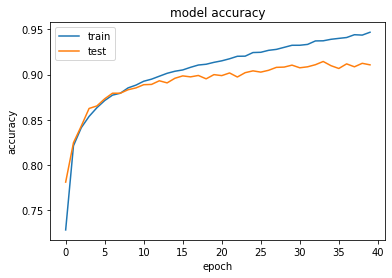

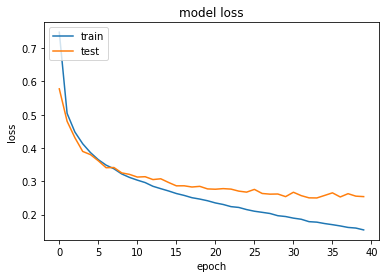

In [38]:
import matplotlib.pyplot as plt
def plot_accuracy_loss(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
plot_accuracy_loss(history)

We can see that after about 15 epochs, the train and test accuracy start to diverge, resulting in overfitting. I then used regularization techniques to generalize the model to close this gap.

## Part D

I chose to implement dropout regularization for my model after the first 2 hidden layers. I chose dropout because it "ignores"/doesn't consider the specified amount of neurons which are choosen at random. For both implementations of drop out, I choose to ignore 20% of the neurons because if I kept all of them, the neurons would start to develop co-dependency amongst each other during training process leading to over-fitting.

In [41]:
### your code for part d
#3 regularization techniques

from tensorflow.keras import regularizers

conv2d = Sequential()

conv2d.add(Conv2D(28, (3, 3), strides=(1, 1), activation="relu",kernel_initializer='he_uniform', padding='same', input_shape = (28,28,1)))
conv2d.add(Dropout(0.2))

conv2d.add(Conv2D(28, (3, 3), strides=(1, 1), activation="relu",kernel_initializer='he_uniform', padding='same'))
conv2d.add(MaxPooling2D(pool_size=(2, 2)))
conv2d.add(Dropout(0.2))

conv2d.add(Flatten())

# add fully connected layers
conv2d.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))

# add output layer
conv2d.add(Dense(9, activation='softmax'))


batch_size = 128
epochs = 40

opt = SGD(lr=0.001, momentum=0.9)
conv2d.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = conv2d.fit(xtrain, y_train, batch_size=batch_size, epochs=epochs, validation_data=(xtest, y_test)) 
test_loss, test_acc = conv2d.evaluate(xtest,  y_test, verbose=2)

print('\nTest accuracy:', test_acc*100)

Train on 47520 samples, validate on 6480 samples
Epoch 1/40
47520/47520 [==============================] - 44s 923us/step - loss: 0.8646 - accuracy: 0.6908 - val_loss: 0.5778 - val_accuracy: 0.7983
Epoch 2/40
47520/47520 [==============================] - 43s 909us/step - loss: 0.5488 - accuracy: 0.8023 - val_loss: 0.4735 - val_accuracy: 0.8377
Epoch 3/40
47520/47520 [==============================] - 44s 929us/step - loss: 0.4836 - accuracy: 0.8251 - val_loss: 0.4517 - val_accuracy: 0.8423
Epoch 4/40
47520/47520 [==============================] - 44s 936us/step - loss: 0.4481 - accuracy: 0.8403 - val_loss: 0.4083 - val_accuracy: 0.8596
Epoch 5/40
47520/47520 [==============================] - 44s 933us/step - loss: 0.4210 - accuracy: 0.8508 - val_loss: 0.3940 - val_accuracy: 0.8648
Epoch 6/40
47520/47520 [==============================] - 44s 931us/step - loss: 0.4042 - accuracy: 0.8563 - val_loss: 0.3743 - val_accuracy: 0.8682
Epoch 7/40
47520/47520 [==============================] -

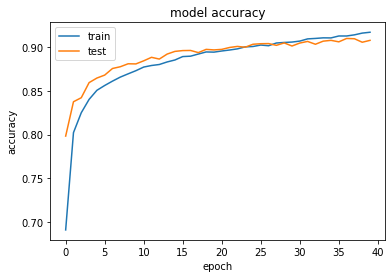

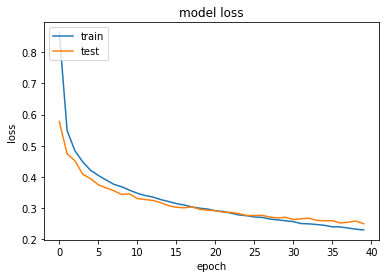

In [42]:
plot_accuracy_loss(history)

We can see that after dropout regulariztion, the train & test accuracy are slowly converging as epochs go up. 
With the added regularization, the model yielded a 90.8% accuracy which dropped from the previous 91.08%. However, this is still a better model since we eliminated the over-fitting almost completely. Since over-fitting is no longer present and my test accuracy is on the border on 90%, I choose to not implement any further regularization as it is no longer needed. The next challenge would be to correct the underfitting of our model to create a higher test accuracy with data augmentation.

## Part E

I used the built in ImageDataGenerator from keras to produce my data augmentation of x2 and x3 of the original train set. I chose various parameters to rotate, shift, flip, and whitening the dataset so that the CNN would have more samples for each model to better classify the test set. 

Below is my code for x2 Data Augmentation resulting in a total of 95,040 train samples.

In [44]:
#part e

from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20,
    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
    vertical_flip=True, fill_mode="nearest",zca_whitening=True)

#x2 data augmentation
train_generator2 = aug.flow(
        xtrain,  
        y=y_train,
        batch_size=47520,
        shuffle=False,
        sample_weight=None)
        

/Users/goldiemalamud/opt/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


I concatenated the train and augmented train set to create 1 big train set: xtrain_x2. I did the same for the labels.

In [45]:
#adding augmented data to training data set X2
xtrain_x2 = np.concatenate((xtrain, train_generator2[0][0]))
ytrain_x2 = np.concatenate((y_train,train_generator2[0][1]))


/Users/goldiemalamud/opt/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/goldiemalamud/opt/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Running the CNN on our x2 data set and plotting the model accuracy and loss. 

Train on 95040 samples, validate on 6480 samples
Epoch 1/40
95040/95040 [==============================] - 89s 935us/step - loss: 0.8260 - accuracy: 0.6957 - val_loss: 0.3148 - val_accuracy: 0.8921
Epoch 2/40
95040/95040 [==============================] - 89s 933us/step - loss: 0.6564 - accuracy: 0.7551 - val_loss: 0.3056 - val_accuracy: 0.8923
Epoch 3/40
95040/95040 [==============================] - 88s 926us/step - loss: 0.6011 - accuracy: 0.7772 - val_loss: 0.2978 - val_accuracy: 0.8944
Epoch 4/40
95040/95040 [==============================] - 88s 929us/step - loss: 0.5672 - accuracy: 0.7902 - val_loss: 0.2907 - val_accuracy: 0.8966
Epoch 5/40
95040/95040 [==============================] - 89s 933us/step - loss: 0.5425 - accuracy: 0.7983 - val_loss: 0.2842 - val_accuracy: 0.9009
Epoch 6/40
95040/95040 [==============================] - 89s 933us/step - loss: 0.5240 - accuracy: 0.8066 - val_loss: 0.2819 - val_accuracy: 0.8991
Epoch 7/40
95040/95040 [==============================] -

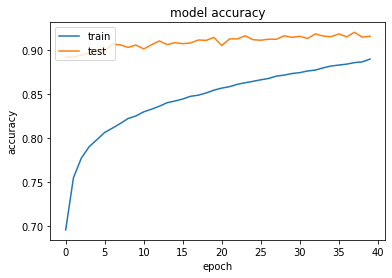

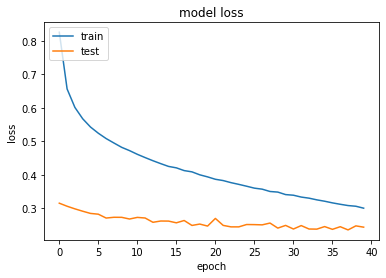

In [46]:
H3 = conv2d.fit(xtrain_x2, ytrain_x2, batch_size = 128,
    validation_data=(xtest,y_test),
    epochs=40,verbose=1)


test_loss, test_acc = conv2d.evaluate(xtest,  y_test, verbose=2)

print('\nTest accuracy:', test_acc*100)
plot_accuracy_loss(H3)

We can see that after regularization and adding on our x2 augmented set, we yielded a 91.6% accuracy. We can see from the graph of model accuracy, that the test set is sitting at a consistent 90-91% accuracy throughout the eopochs. This is good because it shows that there is low variance within the model and would lead to a accurate prediction consistency. 

I then implemented x3 data augmentation. For this augmented batch, I chose slightly different parameters for rotation, shift, flip for more variety in the train set. After concatenation, I now have 142560 training samples.

In [47]:
#adding another 47520 augmented data samples to our training set 
#This time I will be augmenting the original xtrain set of 47520 samples w/ different paraments for more variety. 

aug2 = ImageDataGenerator(rotation_range=90,
    width_shift_range=0.5, height_shift_range=0.5, shear_range=0.05,
    vertical_flip=True, fill_mode="nearest")

#x2 data augmentation
train_generator3 = aug2.flow(
        xtrain,  
        y=y_train,
        batch_size=47520,
        shuffle=False,
        sample_weight=None)

#adding augmented data to training data set X3
xtrain_x3 = np.concatenate((xtrain_x2, train_generator3[0][0]))
ytrain_x3 = np.concatenate((ytrain_x2,train_generator3[0][1]))

xtrain_x3.shape

(142560, 28, 28, 1)

Because of the consistent test accuracy, I decided to decrease my epochs to 35 to lessen the computational expense of the larger dataset (and help my computer from sounding like an airplane about to take off from over-heating :) ) 

Train on 142560 samples, validate on 6480 samples
Epoch 1/35
142560/142560 [==============================] - 118s 827us/step - loss: 1.0344 - accuracy: 0.6615 - val_loss: 0.2535 - val_accuracy: 0.9111
Epoch 2/35
142560/142560 [==============================] - 123s 860us/step - loss: 0.8694 - accuracy: 0.6920 - val_loss: 0.2471 - val_accuracy: 0.9156
Epoch 3/35
142560/142560 [==============================] - 127s 888us/step - loss: 0.8145 - accuracy: 0.7074 - val_loss: 0.2481 - val_accuracy: 0.9148
Epoch 4/35
142560/142560 [==============================] - 124s 871us/step - loss: 0.7836 - accuracy: 0.7174 - val_loss: 0.2532 - val_accuracy: 0.9137
Epoch 5/35
142560/142560 [==============================] - 131s 916us/step - loss: 0.7589 - accuracy: 0.7255 - val_loss: 0.2460 - val_accuracy: 0.9174
Epoch 6/35
142560/142560 [==============================] - 125s 874us/step - loss: 0.7414 - accuracy: 0.7316 - val_loss: 0.2428 - val_accuracy: 0.9194
Epoch 7/35
142560/142560 [============

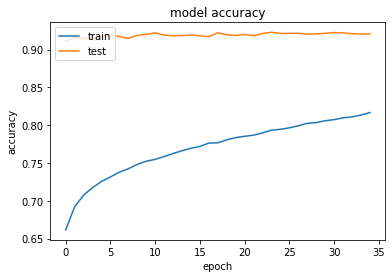

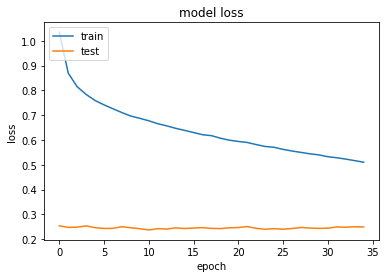

In [48]:
# per the plots of train/test accuracies over epochs, it looks like at 35 epochs the training set was over-fitting.
# So, for x3 augmentation, I added another 47520 augmented samples (now have 47520*3 samples) and 
#decreased the epochs to 35
H4 = conv2d.fit(xtrain_x3, ytrain_x3, batch_size = 128,
    validation_data=(xtest,y_test),
    epochs=35,verbose=1)


test_loss, test_acc = conv2d.evaluate(xtest,  y_test, verbose=2)

print('\nTest accuracy:', test_acc*100)
plot_accuracy_loss(H4)

After implementing x3 data augmentation, I yielded an even higher accuracy of 92.07% and again kept the consistent test accuracy through the number of epochs. The increase of accuracy from the original set -> x2 -> x3 is due to the fact that I am feeding the CNN a larger amount of variation within each label. It was able to "learn" the different variations within each sample and therefore would be able to classify the test set more accurately with the influx of more samples. I think that if I even did x4 or x5 the test accuracy would continue to increase. 

Below, I tried 2 others classical (non-neural-network) machine-learning algorithms to classify the same dataset. I tuned the hyper-parameters of the models and plotted the accuracy as a function of the values of those parameters. 

## 1. KNN 

I converted x_train and x_test to 1D arrays in order to make the classification process for KNN smoother. I then fit my base KNN model of k = 3 to x_train and y_train.

In [55]:
### your code

#KNN 
from sklearn.neighbors import KNeighborsClassifier

x_train = xtrain.reshape(-1, 784) #28*28=784
x_test = xtest.reshape(-1, 784)

x_train = x_train.astype('float32')  
x_test = x_test.astype('float32')
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

The train and test accuracies are seen below at 85.22% and 90.9% respectively. 

In [58]:
test_accuracy = knn.score(x_test,y_test)
train_accuracy = knn.score(x_train,y_train)
print("Test Accuracy: ", test_accuracy)
print("Train Accuracy: ", train_accuracy)

Test Accuracy:  0.8521604938271605
Train Accuracy:  0.9090909090909091


I then performed GridSearch to find the best parameters for my model.

In [60]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors': [3,5,7,9,11], 'metric':['minkowski','euclidean']}

gs = GridSearchCV(KNeighborsClassifier(),grid_params,verbose=0,cv=3,n_jobs=-1)


In [61]:
gs_results = gs.fit(x_train,y_train)


/Users/goldiemalamud/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [62]:
print("Best accuracy: ", gs_results.best_score_)
print("Best parameters: ", gs_results.best_params_)

Best accuracy:  0.8356271043771044
Best parameters:  {'metric': 'minkowski', 'n_neighbors': 3}


With this result from gridsearch (a technique to tune hyper-parameters), the ideal parameters are minkowski for the metric and k = 3. This was already implemented with my base knn model and so I will choose these parameters as my knn model and train this model with my data augmented train set (x2). I once again reshaped the train array to 1D so that KNN will be able to interpret more easily. 

In [87]:
xtrain_x2 = xtrain_x2.reshape(-1, 784) #28*28=784
xtrain_x2 = xtrain_x2.astype('float32')  

knn.fit(xtrain_x2,ytrain_x2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Since I had the same parameters for my base model and after tuning my parameters. I will be plotting the train and test accuracy appropriately. 

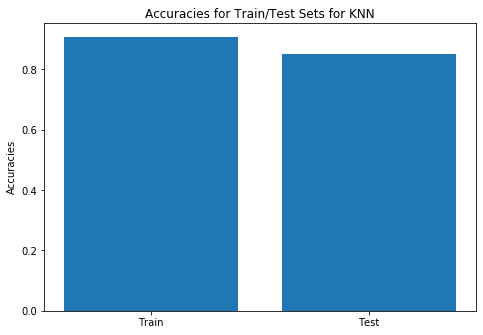

In [102]:
import matplotlib.pyplot as plt

knn_accuracies = []
knn_accuracies.append(train_accuracy)
knn_accuracies.append(test_accuracy)


#plot bar chart 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['Train', 'Test']
y = knn_accuracies
ax.bar(x,y)
ax.set_title("Accuracies for Train/Test Sets for KNN")
ax.set_ylabel('Accuracies')
plt.show()

From this plot, we can see that the train set has a higher accuracy that the test set. This is probably due to over-fitting. 

## 2. Random Forests 

My base model for Random Forest consists of max_depth=2. Because I used one-hot encoding previously on my labels, I needed to convert the 9 features back to 1 feature. 

In [117]:
from sklearn.ensemble import RandomForestClassifier

#method to convert shape (x, 9) to (x,1) to fit into Random forest classifer
def convert_9_to_1(set):

    converted_labels = []
    for i in set:
        if i[0] == 1:
            converted_labels.append(247)
        elif i[1] == 1:
            converted_labels.append(248)
        elif i[2] == 1:
            converted_labels.append(249)
        elif i[3] == 1:
            converted_labels.append(250)
        elif i[4] == 1:
            converted_labels.append(251)
        elif i[5] == 1:
            converted_labels.append(252)
        elif i[6] == 1:
            converted_labels.append(253)
        elif i[7] == 1:
            converted_labels.append(254)
        elif i[8] == 1:
            converted_labels.append(255)
    return converted_labels

y_train1 = convert_9_to_1(y_train) 
y_train1_x2 = convert_9_to_1(ytrain_x2)

y_test1 = convert_9_to_1(y_test)



95040

I fitted my base Random Forest Classifer to x_train and y_train1 and printed out their respective accuracy scores. 

In [112]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train, y_train1)
train_accuracy_rf = rf.score(x_train,y_train1)
test_accuracy_rf = rf.score(x_test,y_test1)
print("Train accuracy: ",train_accuracy_rf)
print("Test accuracy: ",test_accuracy_rf)


/Users/goldiemalamud/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train accuracy:  0.6296717171717172
Test accuracy:  0.6231481481481481


In [113]:
#fine tune parameters of random forest
params = {'n_estimators': [100,200], 'criterion' :['gini','entropy'], 'max_depth': [2,4,6]}
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=1, cv=3)
gsRF_results = grid_search_cv.fit(x_train, y_train1)

print("Best accuracy: ", gsRF_results.best_score_)
print("Best parameters: ", gsRF_results.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 14.0min finished


Best accuracy:  0.7967171717171717
Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 200}


The best parameters for Random Forest are shown above. Next, I used the best features from GridSearch and trained the model on x_train and y_train1. As you can see from the results, both of the train and test accuracies increased by almost 20% - Nice!

In [114]:
rf_tuned = RandomForestClassifier(criterion ='gini', max_depth= 6, n_estimators= 200)
rf_tuned.fit(x_train, y_train1)
print("Fit training set to random forest tuned")
train_accuracy_rf_tuned = rf_tuned.score(x_train,y_train1)
print("Computed train accuracy")
test_accuracy_rf_tuned = rf_tuned.score(x_test,y_test1)
print("Computed test accuracy")
print("Train accuracy: ",train_accuracy_rf_tuned)
print("Test accuracy: ",test_accuracy_rf_tuned)


Fit training set to random forest tuned
Computed train accuracy
Computed test accuracy
Train accuracy:  0.8011574074074074
Test accuracy:  0.803395061728395


Next, I fit the x2 train set to my tuned model. After printing the train/test accuracies from this run, I got 66.39% and 77.35% respectively. This was alot lower than the accuracy scores I got from training on the original set. I believe this is due to the fact that each tree in a Random Forest picks only from a random subset of features. In our data set and with the added augmented dataset, the variability of each pixel can dramatically change and therefore create a lower accuracy score.

In [119]:
rf_tuned = RandomForestClassifier(criterion ='gini', max_depth= 6, n_estimators= 200)
rf_tuned.fit(xtrain_x2, y_train1_x2)
print("Fit training set to random forest tuned")
train_accuracy_rf_tuned_x2 = rf_tuned.score(xtrain_x2,y_train1_x2)
print("Computed train accuracy")
test_accuracy_rf_tuned_x2 = rf_tuned.score(x_test,y_test1)
print("Computed test accuracy")
print("Train accuracy: ",train_accuracy_rf_tuned_x2)
print("Test accuracy: ",test_accuracy_rf_tuned_x2)

Fit training set to random forest tuned
Computed train accuracy
Computed test accuracy
Train accuracy:  0.6638573232323233
Test accuracy:  0.7734567901234568


Text(0, 0.5, 'Accuracy')

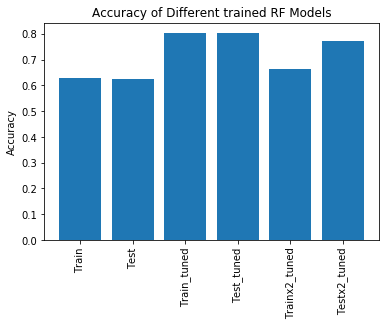

In [152]:
import matplotlib.pyplot as plt

rf_train = [train_accuracy_rf,test_accuracy_rf,
            train_accuracy_rf_tuned,test_accuracy_rf_tuned,
            train_accuracy_rf_tuned_x2,test_accuracy_rf_tuned_x2]
#rf_test = [test_accuracy_rf,test_accuracy_rf_tuned,test_accuracy_rf_tuned_x2]
x = ['Train','Test','Train_tuned','Test_tuned','Trainx2_tuned','Testx2_tuned']
plt.bar(x,rf_train)
plt.xticks(rotation='vertical')
plt.title("Accuracy of Different trained RF Models")
plt.ylabel("Accuracy")
#plt.plot(rf_test,'o')

From the plot above, we can see how the different models performed against each other. 

- "Train" and "Test" refer to the base Random Forest Model. Out of all the models they scored the lowest but were almost identical to each other. This means that the base model had high bias and low variance since the model is underfit. 
- "Train_tuned" and "Test_tuned" refer to the Random Forest Model with the tuned parameters. These both yielded the highest accuracy of the group and this would be the ideal model I choose for the Random Forest model. This model has a low variance and low bias since they yielded similar accuracies and were both relatively high (prediciting the labels "correctly" so some degree).
- "Trainx2_tuned" and "Testx2_tuned" refer to the Random Forest Model with the tuned parameters with the x2 augmented data set. We can see that with this model is underfit and has a high bias and low variance.

To simulate real-world situations better and to evaluate my algorithms above, I predicted previously unseen data without their associated labels. I ran the algorithms I created above on this new dataset and create a CSV file with 3 columns, which includes the labels that I predicted with my 3 proposed algorithms in the following order: first column is the NN, second column is the KNN model, and third column is the Random Forest model. 

Here, I load in the "xnew 2.csv" file and reshape the data to a 2D array. I predict the labels from each of the 3 models. 

In [120]:
import numpy as np

#load in new test set
XNew = np.loadtxt('xnew 2.csv')
#Xnew = Xnew.reshape((xnew.shape[0], 28,28))
XNew = XNew.reshape((XNew.shape[0], 28,28,1))
XNew = XNew.astype('float32')

#scale train and test images to 0 to 1
XNew = XNew / 255.0
XNew_1 = XNew.reshape(-1,784)


#output prediction
CNN_pred = conv2d.predict_classes(XNew)
knn_pred = knn.predict(XNew_1)
rf_tuned_pred = rf_tuned.predict(XNew_1)

Below, I convert the CNN old labels [0,8] to the appropriate [247,255] labels. 

In [121]:
#convert 0-8 classes back to 247-255
class_labels = [247,248,249,250,251,252,253,254,255]
old_labels = [0,1,2,3,4,5,6,7,8]
def convert_oldLabels(t_set):
    for i in range(len(t_set)):
        if t_set[i] == old_labels[0]:
            t_set[i] = class_labels[0]
            
        elif t_set[i] == old_labels[1]:
            t_set[i] = class_labels[1]
            
        elif t_set[i] == old_labels[2]:
            t_set[i] = class_labels[2]
            
        elif t_set[i] == old_labels[3]:
            t_set[i] = class_labels[3]
            
        elif t_set[i] == old_labels[4]:
            t_set[i] = class_labels[4]
            
        elif t_set[i] == old_labels[5]:
            t_set[i] = class_labels[5]
            
        elif t_set[i] == old_labels[6]:
            t_set[i] = class_labels[6]
            
        elif t_set[i] == old_labels[7]:
            t_set[i] = class_labels[7]
            
        elif t_set[i] == old_labels[8]:
            t_set[i] = class_labels[8]
    return t_set

CNN_pred = convert_oldLabels(CNN_pred)

Below, I change the shape of knn_pred from 9 features to a 1D array and change the [0,8] labels to [247,255] labels. 

In [134]:
#Reshape knn_pred from 9 features to 1 and change [0,8] to [247,255]
import random

KNN_pred = []
for i in knn_pred:
    if i[0] == 1:
        KNN_pred.append(247)
    elif i[1] == 1:
        KNN_pred.append(248)
    elif i[2] == 1:
        KNN_pred.append(249)
    elif i[3] == 1:
        KNN_pred.append(250)
    elif i[4] == 1:
        KNN_pred.append(251)
    elif i[5] == 1:
        KNN_pred.append(252)
    elif i[6] == 1:
        KNN_pred.append(253)
    elif i[7] == 1:
        KNN_pred.append(254)
    elif i[8] == 1:
        KNN_pred.append(255)
    else:
        KNN_pred.append(random.randint(247, 255))
        
print(KNN_pred[:5])
print(CNN_pred[:5])    

[249, 247, 254, 249, 251]
[251 247 254 249 251]


In [135]:
print("KNN pred: ", len(KNN_pred))
print("RF pred: ", len(rf_tuned_pred))
print("CNN pred: ", len(CNN_pred))

KNN pred:  1080
RF pred:  1080
CNN pred:  1080


And lastly, I append my predicted label arrays to my csv file!

In [136]:
#attach to CSV
import pandas as pd 
xnew_predictions = {'CNN': CNN_pred, 'KNN': KNN_pred, 'Random Forest': rf_tuned_pred}
df = pd.DataFrame(xnew_predictions, columns = ['CNN','KNN','Random Forest'])
df.to_csv('GoldieMalamud_XNew_Predictions.csv')

## Questions? 
Email me at goldiemalamud@gmail.com